In [11]:
#. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Datasets
country_latest = pd.read_csv(r"F:\INTERNSHIP\PYTHON\Covid-19\country_wise_latest.csv")
clean_complete = pd.read_csv(r"F:\INTERNSHIP\PYTHON\Covid-19\covid_19_clean_complete.csv")
day_wise = pd.read_csv(r"F:\INTERNSHIP\PYTHON\Covid-19\day_wise.csv")
full_grouped = pd.read_csv(r"F:\INTERNSHIP\PYTHON\Covid-19\full_grouped.csv")
usa_country_wise = pd.read_csv(r"F:\INTERNSHIP\PYTHON\Covid-19\usa_country_wise.csv")
worldometer = pd.read_csv(r"F:\INTERNSHIP\PYTHON\Covid-19\worldometer_data.csv")
   

In [12]:
# Data Cleaning
country_latest.columns = country_latest.columns.str.strip().str.replace(' ', '_')
day_wise.columns = day_wise.columns.str.strip().str.replace(' ', '_')
full_grouped.columns = full_grouped.columns.str.strip().str.replace(' ', '_')
worldometer.columns = worldometer.columns.str.strip().str.replace(' ', '_')


# Global Totals from country_wise_latest


In [13]:
print("Global Totals")
print("Confirmed:", country_latest['Confirmed'].sum())
print("Deaths:", country_latest['Deaths'].sum())
print("Recovered:", country_latest['Recovered'].sum())
print("Active:", country_latest['Active'].sum())


Global Totals
Confirmed: 16480485
Deaths: 654036
Recovered: 9468087
Active: 6358362


##  Top 10 Countries by Confirmed, Deaths, Active Cases


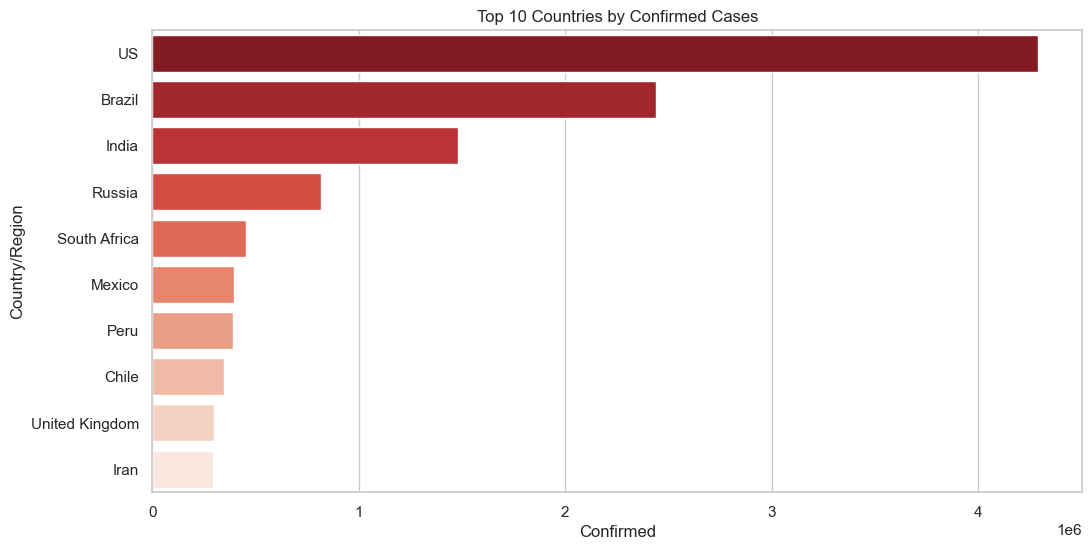

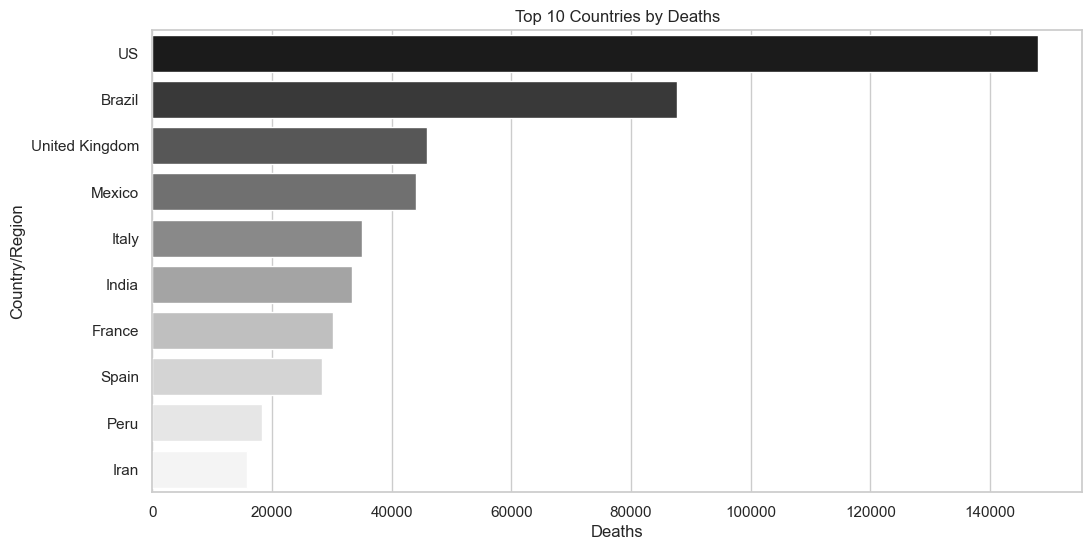

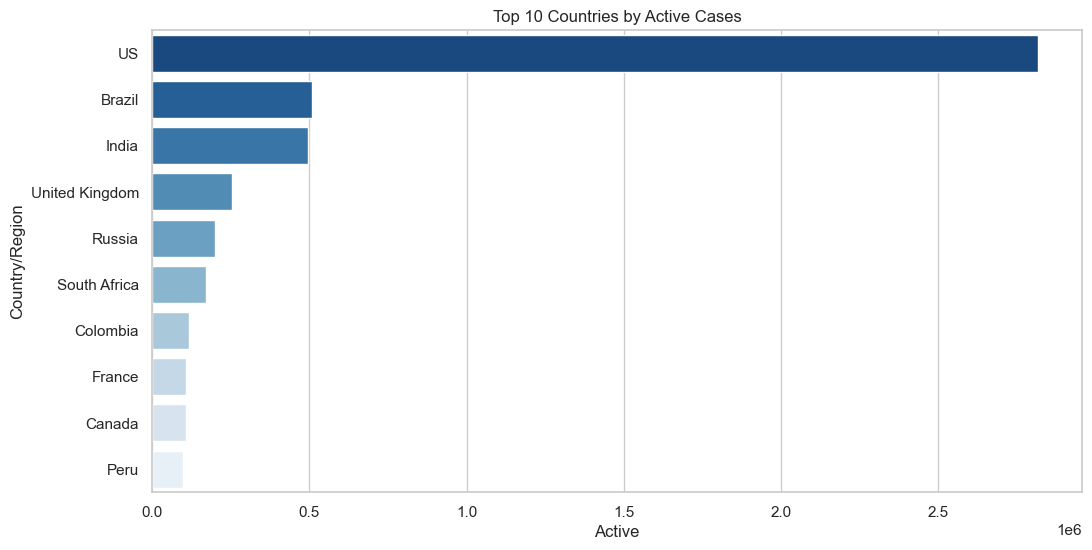

In [14]:

top_confirmed = country_latest.sort_values('Confirmed', ascending=False).head(10)
top_deaths = country_latest.sort_values('Deaths', ascending=False).head(10)
top_active = country_latest.sort_values('Active', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_confirmed, y='Country/Region', x='Confirmed', palette='Reds_r')
plt.title("Top 10 Countries by Confirmed Cases")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=top_deaths, y='Country/Region', x='Deaths', palette='Greys_r')
plt.title("Top 10 Countries by Deaths")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=top_active, y='Country/Region', x='Active', palette='Blues_r')
plt.title("Top 10 Countries by Active Cases")
plt.show()


#  Global Trend Over Time (day_wise.csv)


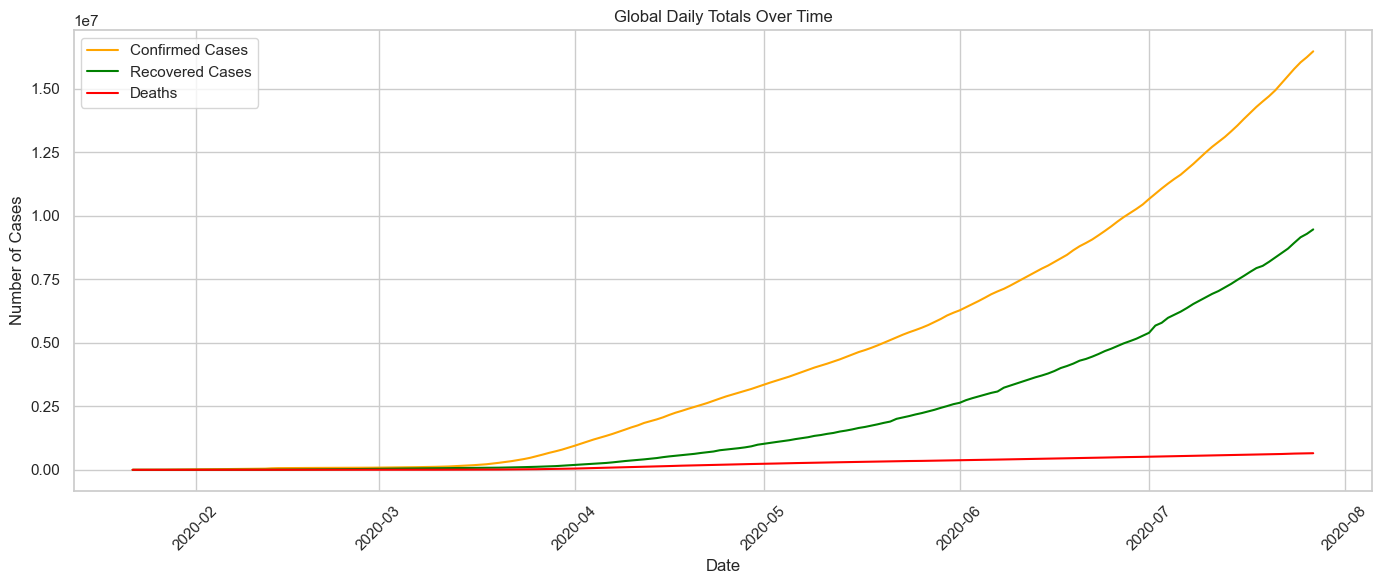

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

day_wise['Date'] = pd.to_datetime(day_wise['Date'])

# Plot: Global Daily Totals Over Time
plt.figure(figsize=(14,6))
plt.plot(day_wise['Date'], day_wise['Confirmed'], label='Confirmed Cases', color='orange')
plt.plot(day_wise['Date'], day_wise['Recovered'], label='Recovered Cases', color='green')
plt.plot(day_wise['Date'], day_wise['Deaths'], label='Deaths', color='red')

plt.title("Global Daily Totals Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Daily New Cases Globally


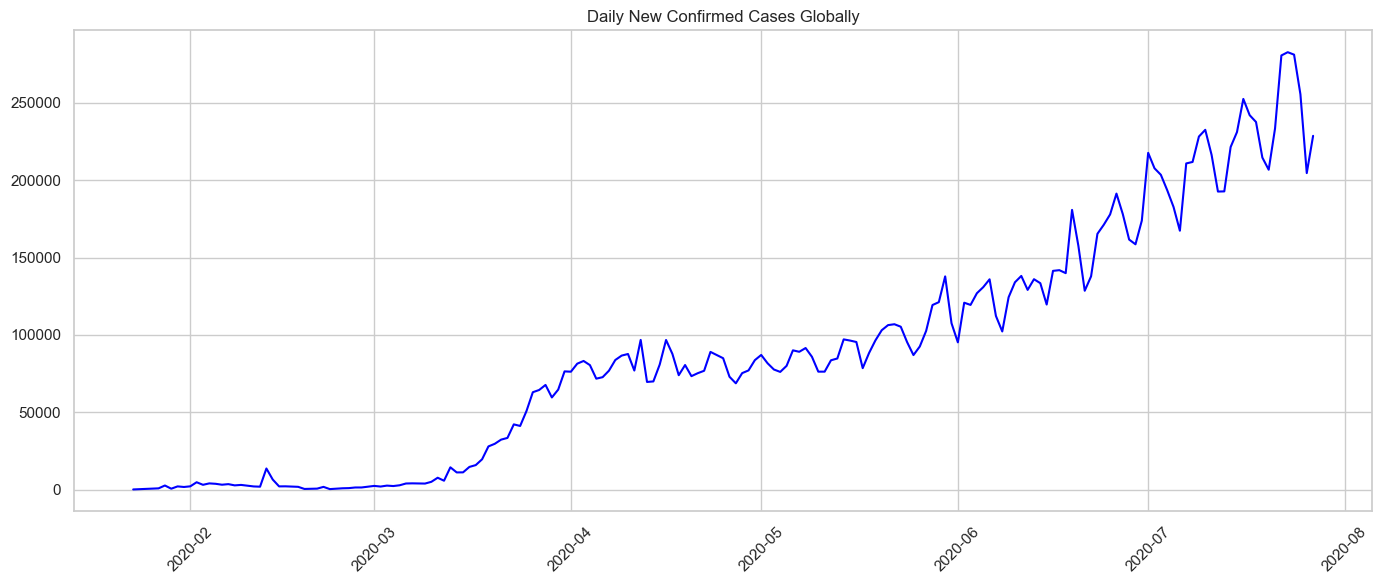

In [17]:
plt.figure(figsize=(14,6))
plt.plot(day_wise['Date'], day_wise['Confirmed'] - day_wise['Confirmed'].shift(1), label='New Confirmed', color='blue')
plt.title("Daily New Confirmed Cases Globally")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  USA COVID Trend (usa_country_wise.csv)


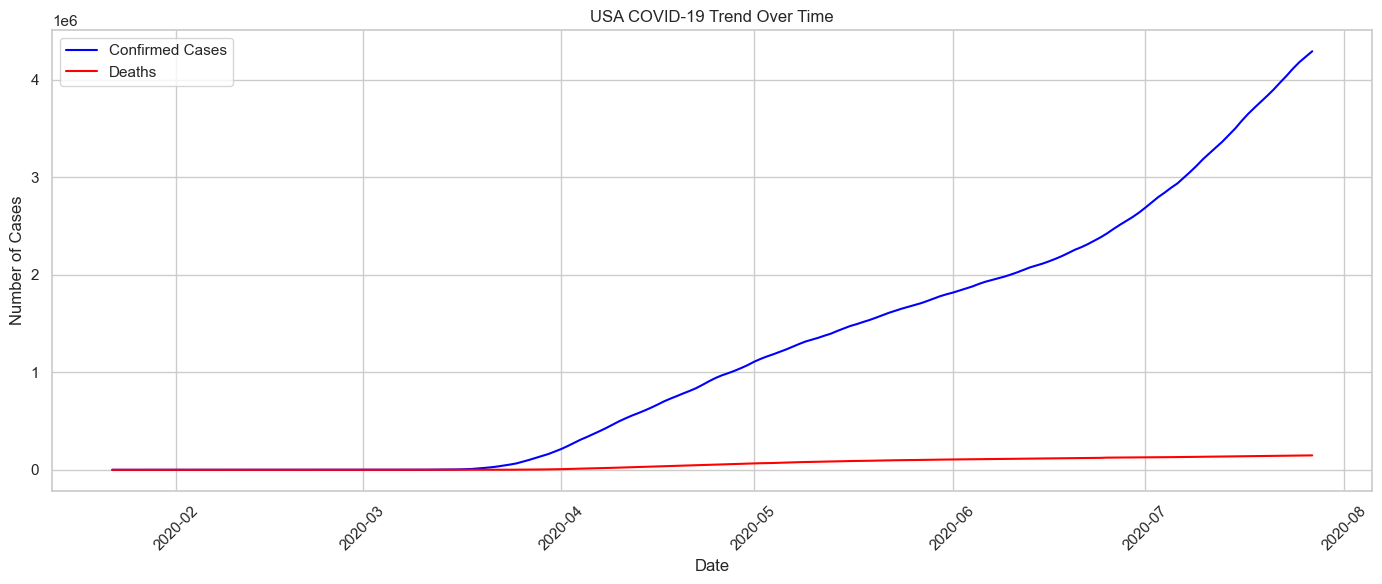

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' is in datetime format
usa_country_wise['Date'] = pd.to_datetime(usa_country_wise['Date'])

# Group data by date and calculate totals
usa_data = usa_country_wise.groupby('Date')[['Confirmed', 'Deaths']].sum().reset_index()

# Plot
plt.figure(figsize=(14,6))
plt.plot(usa_data['Date'], usa_data['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(usa_data['Date'], usa_data['Deaths'], label='Deaths', color='red')

plt.title("USA COVID-19 Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#  Tests per Million from worldometer_data.csv


In [23]:
print(worldometer.columns.tolist())


['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot_Cases/1M_pop', 'Deaths/1M_pop', 'TotalTests', 'Tests/1M_pop', 'WHO_Region']


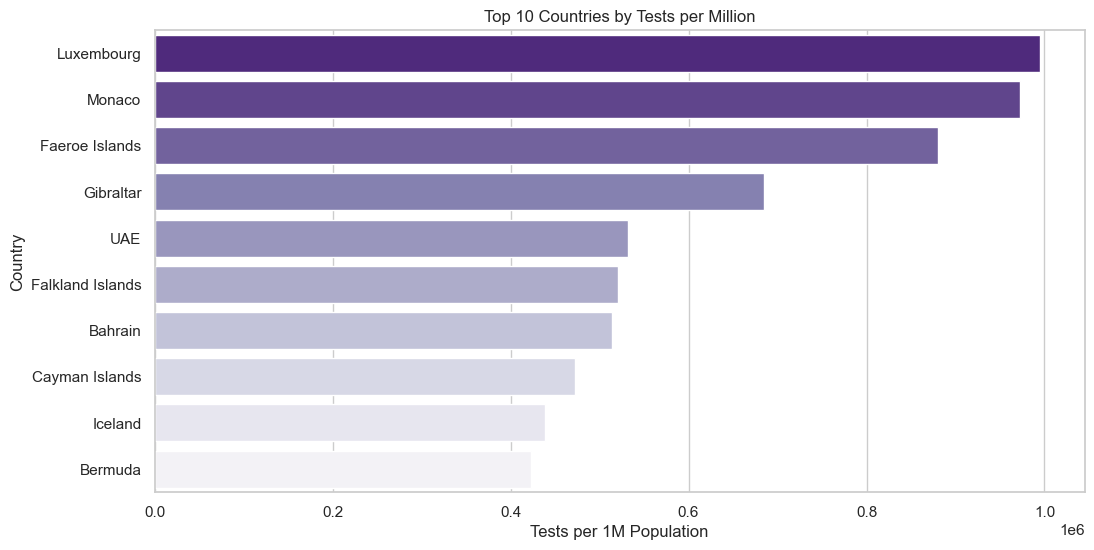

In [24]:
# Convert 'Tests/1M_pop' to numeric (remove commas, handle errors)
worldometer['Tests/1M_pop'] = pd.to_numeric(
    worldometer['Tests/1M_pop'].astype(str).str.replace(',', ''),
    errors='coerce'
)

# Drop missing values (if any)
top_tests = worldometer.dropna(subset=['Tests/1M_pop'])

# Get top 10
top_tests = top_tests.sort_values('Tests/1M_pop', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_tests, y='Country/Region', x='Tests/1M_pop', palette='Purples_r')
plt.title("Top 10 Countries by Tests per Million")
plt.xlabel("Tests per 1M Population")
plt.ylabel("Country")
plt.show()
